## Carlos Ricardo Villena Cabrejos 

## Elaboración del Notebook para el cálculo de cuartiles 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:

datos = pd.read_csv('train.csv')

In [5]:
datos.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [20]:
datos.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<AxesSubplot:xlabel='Pclass', ylabel='Age'>

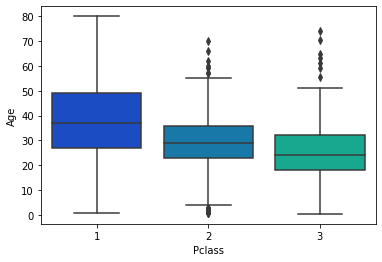

In [8]:
sns.boxplot(x='Pclass',y='Age',data=datos,palette='winter')

###  Hallamos los pasajeros por clase 1,2,3 

In [21]:

pasaj_c1 = datos[(datos['Pclass']==1) & (datos['Age'].isnull()==False)]
pasaj_c2 = datos[datos['Pclass']==2]
pasaj_c3 = datos[datos['Pclass']==3]

In [22]:
edades_c1 = pasaj_c1['Age']
edades_c2 = pasaj_c2['Age'].dropna()
edades_c3 = pasaj_c3['Age'].dropna()


### Hallando los cuartiles usando la funcion quantile 0.25, 0.50, 0,75

In [23]:

Cuartiles_c1=pd.DataFrame(edades_c1.quantile([0.25,0.50,0.75]))
Cuartiles_c1.columns = ["Edad"]
Cuartiles_c1.index = ["Q1","Q2","Q3"]
Cuartiles_c2=pd.DataFrame(edades_c2.quantile([0.25,0.50,0.75]))
Cuartiles_c2.columns = ["Edad"]
Cuartiles_c2.index = ["Q1","Q2","Q3"]
Cuartiles_c3=pd.DataFrame(edades_c3.quantile([0.25,0.50,0.75]))
Cuartiles_c3.columns = ["Edad"]
Cuartiles_c3.index = ["Q1","Q2","Q3"]


### Impresión de los Cuartiles c1,c2,c3

In [34]:

print("Primera Clase".upper())
print(Cuartiles_c1)
print("Segunda Clase".upper())
print(Cuartiles_c2)
print("Tercera Clase".upper())
print(Cuartiles_c3)


PRIMERA CLASE
    Edad
Q1  27.0
Q2  37.0
Q3  49.0
SEGUNDA CLASE
    Edad
Q1  23.0
Q2  29.0
Q3  36.0
TERCERA CLASE
    Edad
Q1  18.0
Q2  24.0
Q3  32.0


### Calculamos el promedio edad por cada Clase

In [29]:

print("Promedio edad 1ra Clase: ".upper(),np.round(edades_c1.mean(),2))
print("Promedio edad 2da Clase: ".upper(),np.round(edades_c2.mean(),2))
print("Promedio edad 3ra clase: ".upper(),np.round(edades_c3.mean(),2))

PROMEDIO EDAD 1RA CLASE:  38.23
PROMEDIO EDAD 2DA CLASE:  29.88
PROMEDIO EDAD 3RA CLASE:  25.14


### Realizando la agrupación de Pclass

In [30]:

psj_por_clase = datos.groupby(['Pclass'])

### Hallando los cuartiles usando la funcion quantile 0.25, 0.50, 0,75

In [31]:

psj_por_clase['Age'].quantile([0.25,0.50,0.75])

Pclass      
1       0.25    27.0
        0.50    37.0
        0.75    49.0
2       0.25    23.0
        0.50    29.0
        0.75    36.0
3       0.25    18.0
        0.50    24.0
        0.75    32.0
Name: Age, dtype: float64

In [32]:
print('la mediana de la clase 1 es 37'.upper())
print('la mediana de la clase 3 es 29'.upper())
print('la mediana de la clase 3 es 24'.upper())

LA MEDIANA DE LA CLASE 1 ES 37
LA MEDIANA DE LA CLASE 3 ES 29
LA MEDIANA DE LA CLASE 3 ES 24


In [33]:

print("Promedio edad 1ra Clase: ".upper(),pasaj_c1['Age'].mean())
print("Promedio edad 2da Clase: ".upper(),pasaj_c2['Age'].mean())
print("Promedio edad 3ra clase: ".upper(),pasaj_c3['Age'].mean())

PROMEDIO EDAD 1RA CLASE:  38.233440860215055
PROMEDIO EDAD 2DA CLASE:  29.87763005780347
PROMEDIO EDAD 3RA CLASE:  25.14061971830986
